In [ ]:
# importing necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [ ]:
BATCH_SIZE=32
IMAGE_SIZE=(299,299)

In [ ]:
train_data_dir="/Users/admin/Downloads/DSGP/Fruit Dataset_S/train"
test_data_dir="/Users/admin/Downloads/DSGP/Fruit Dataset_S/test"
vslid_data_dir ="/Users/admin/Downloads/DSGP/Fruit Dataset_S/val"

In [ ]:
train_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                       batch_size=BATCH_SIZE,
                                                       image_size=IMAGE_SIZE,
                                                       subset='training',
                                                       validation_split=0.1,
                                                       seed=42)

validation_data=tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                       batch_size=BATCH_SIZE,
                                                       image_size=IMAGE_SIZE,
                                                       subset='validation',
                                                       validation_split=0.1,
                                                       seed=42)

test_data=tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                       batch_size=BATCH_SIZE,
                                                       image_size=IMAGE_SIZE)



Found 5280 files belonging to 3 classes.
Using 4752 files for training.
Found 5280 files belonging to 3 classes.
Using 528 files for validation.


2024-04-03 17:26:20.516935: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-04-03 17:26:20.516970: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-03 17:26:20.516977: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-03 17:26:20.517170: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-03 17:26:20.517195: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 660 files belonging to 3 classes.


In [ ]:
class_name= train_data.class_names
class_name

['Over Ripe', 'Ripe', 'Unripe']

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 299, 299, 3)
(32,)


2024-04-03 17:26:21.076442: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-04-03 17:26:21.432329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


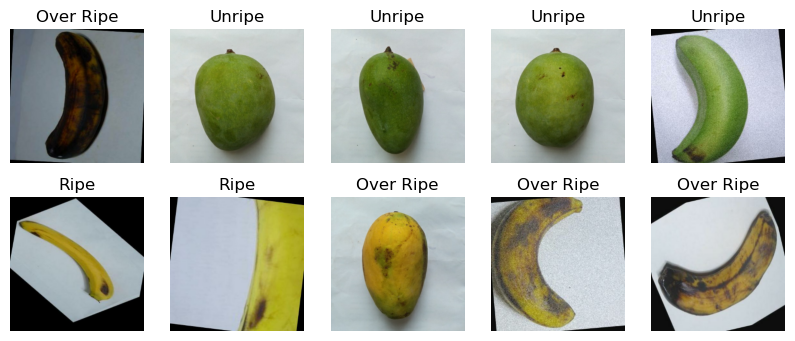

In [ ]:
#plot data sample
plt.figure(figsize=(10,4))
for image , label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_name[label[i]])
    plt.axis('off')

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[214.9515   224.9515   223.9515  ]
   [214.       224.       223.      ]
   [214.       224.       223.      ]
   ...
   [197.04135  206.04135  203.04135 ]
   [196.14548  205.14548  202.14548 ]
   [195.0485   204.0485   201.0485  ]]

  [[215.46321  225.46321  224.46321 ]
   [214.43727  224.43727  223.43727 ]
   [214.       224.       223.      ]
   ...
   [197.75417  206.75417  203.75417 ]
   [196.65718  205.65718  202.65718 ]
   [195.5602   204.5602   201.5602  ]]

  [[215.09866  225.09866  224.09866 ]
   [214.12575  224.12575  223.12575 ]
   [214.2068   224.2068   223.2068  ]
   ...
   [198.24246  207.24246  204.24246 ]
   [197.14548  206.14548  203.14548 ]
   [196.0485   205.0485   202.0485  ]]

  ...

  [[177.89417  189.33572  191.18854 ]
   [178.74846  190.12578  192.      ]
   [178.75752  189.75752  191.75752 ]
   ...
   [182.85281  194.85281  194.85281 ]
   [182.97859  194.97859  194.97859 ]
   [183.       195.       195.      ]]

  [[177.       191.       192.    

2024-04-03 17:26:21.979102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
train_data= train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.777107   0.83985215 0.83985215]
   [0.7770411  0.83864516 0.8392157 ]
   [0.78039217 0.8352941  0.8392157 ]
   ...
   [0.7560741  0.810976   0.8148976 ]
   [0.75686276 0.8117647  0.8156863 ]
   [0.75313133 0.8080333  0.81195486]]

  [[0.7822087  0.8409404  0.84294707]
   [0.7784639  0.8366385  0.83892375]
   [0.77838546 0.8332874  0.837209  ]
   ...
   [0.75485605 0.809758   0.8136796 ]
   [0.75485605 0.809758   0.8136796 ]
   [0.75303406 0.807936   0.8118576 ]]

  [[0.78412354 0.8390255  0.84294707]
   [0.77982163 0.8347236  0.83864516]
   [0.7764706  0.83137256 0.8352941 ]
   ...
   [0.75213027 0.8070322  0.8109538 ]
   [0.7529412  0.80784315 0.8117647 ]
   [0.7529412  0.80784315 0.8117647 ]]

  ...

  [[0.70941687 0.7682404  0.78784823]
   [0.71331626 0.7721398  0.7917476 ]
   [0.7141627  0.77298623 0.7925941 ]
   ...
   [0.70277166 0.7459089  0.7615952 ]
   [0.6986097  0.74174696 0.75743324]
   [0.69057643 0.7337137  0.74939996]]

  [[0.7079875  0.766811   0.786418

2024-04-03 17:26:22.308558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
train_data = train_data.map(lambda x, y: (x, tf.one_hot(y, depth=3)))
validation_data = validation_data.map(lambda x, y: (x, tf.one_hot(y, depth=3)))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import Xception

inputs = layers.Input(shape=(299,299,3))
x_model = Xception(include_top=True, weights=None, classes=3)(inputs)

outputs = layers.Dense(3, activation='softmax')(x_model)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)



Model Building

In [ ]:
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 3)              │    20,867,627 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,867,639 (79.60 MB)

 Trainable params: 20,813,111 (79.40 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model trainnig

In [ ]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=15,
                    validation_data= validation_data)

end_time = time.time()


Epoch 1/15


2024-04-03 17:26:27.528082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


149/149 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.5163 - loss: 0.8884 - val_accuracy: 0.3220 - val_loss: 1.1489
Epoch 2/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.8740 - loss: 0.6979 - val_accuracy: 0.3258 - val_loss: 1.3182
Epoch 3/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.8685 - loss: 0.6282 - val_accuracy: 0.6193 - val_loss: 0.8824
Epoch 4/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.8920 - loss: 0.5363 - val_accuracy: 0.7500 - val_loss: 0.6926
Epoch 5/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.8591 - loss: 0.5360 - val_accuracy: 0.8333 - val_loss: 0.5554
Epoch 6/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.8644 - loss: 0.4955 - val_accuracy: 0.4394 - val_loss: 1.2997
Epoch 7/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.8670 - loss: 0.4679 - val_accuracy: 0.4905 - val_loss: 1.2185
Epoch 8/15
149/149 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.8675 - loss: 0.4412 - val_accuracy: 0.562

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

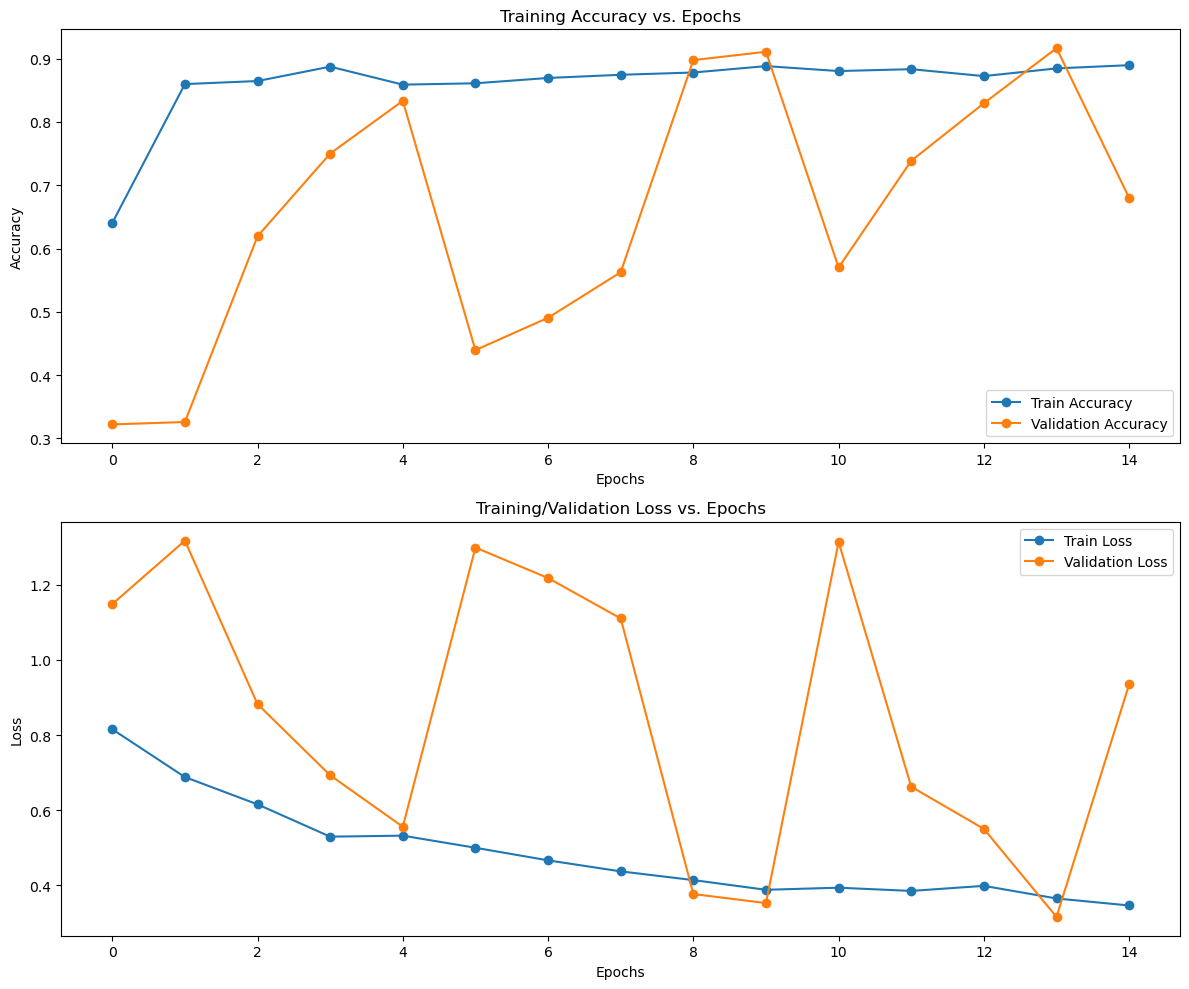

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()

In [ ]:
predictions = model.predict(test_data)

21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 463ms/step


In [ ]:
test_data = test_data.map(lambda x, y: (x, tf.one_hot(tf.cast(y, tf.uint8), depth=3, on_value=1.0, off_value=0.0)))
test_loss, test_accuracy = model.evaluate(test_data, batch_size=BATCH_SIZE)

21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - accuracy: 0.6542 - loss: 1.0060
